# MSM construction

In [2]:
import numpy as np
import glob

from IsingTrajectory import *

#tags = ['a','b','c','d','e','f','g','h']
#tags = ['i','j','k','l','m','n','o','p']
tags = ['q','r','s','t','u','v','w','x']
tags += ['aa','bb','cc','dd','ee','ff','gg','hh']


# convert kinetic MC trajectories to discrete-time trajs for MSM analysis
filenames = ['/Volumes/vv-data2017/ising_long_30C/%s_all.traj.npy'%s for s in tags]
### filenames = glob.glob('?0??_10M_deps24.0.traj.npy')
names = [f.replace('.traj.npy','') for f in filenames]

for name in names:
    t = IsingTrajectory()
    t.load(name, verbose=True)
    
    # discretize in microsecond intervals: dt=1.0e-6
    t.discretize(name, dt=1.0e-6)   # saves files ending with all.msmtraj.npy
    del t



Read /Volumes/vv-data2017/ising_long_30C/q_all.stats.dat
Read /Volumes/vv-data2017/ising_long_30C/q_all.traj.npy
Wrote: /Volumes/vv-data2017/ising_long_30C/q_all.msmtraj.npy
Read /Volumes/vv-data2017/ising_long_30C/r_all.stats.dat
Read /Volumes/vv-data2017/ising_long_30C/r_all.traj.npy
Wrote: /Volumes/vv-data2017/ising_long_30C/r_all.msmtraj.npy
Read /Volumes/vv-data2017/ising_long_30C/s_all.stats.dat
Read /Volumes/vv-data2017/ising_long_30C/s_all.traj.npy
Wrote: /Volumes/vv-data2017/ising_long_30C/s_all.msmtraj.npy
Read /Volumes/vv-data2017/ising_long_30C/t_all.stats.dat
Read /Volumes/vv-data2017/ising_long_30C/t_all.traj.npy
Wrote: /Volumes/vv-data2017/ising_long_30C/t_all.msmtraj.npy
Read /Volumes/vv-data2017/ising_long_30C/u_all.stats.dat
Read /Volumes/vv-data2017/ising_long_30C/u_all.traj.npy
Wrote: /Volumes/vv-data2017/ising_long_30C/u_all.msmtraj.npy
Read /Volumes/vv-data2017/ising_long_30C/v_all.stats.dat
Read /Volumes/vv-data2017/ising_long_30C/v_all.traj.npy
Wrote: /Volumes/v

## time-lagged Indepedent Component Analysis (tICA)

Next, the tICA algorithm is used perform dimensionality reduction to a subspace of tICs representing the degrees fo freedom along which the most time-correlated (i.e. slowest) motions occur. 

In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt

from msmbuilder.decomposition import tICA, PCA


tags = ['a','b','c','d','e','f','g','h']
tags += ['i','j','k','l','m','n','o','p']
tags += ['q','r','s','t','u','v','w','x']   
tags += ['aa','bb','cc','dd','ee','ff','gg','hh']


filenames = ['/Volumes/vv-data2017/ising_long_30C/%s_all.msmtraj.npy'%s for s in tags]
nfiles = len(filenames)
trajs = [np.load(filenames[trial]) for trial in range(nfiles)]

ntica_values = [20]
lag_times = [1,2,4,10,40,100]

for ntica in ntica_values:
    for lag in lag_times:

        print 'Computing tICA decomposition for ntica = %d ...'%ntica
        tica = tICA(n_components=ntica, lag_time=lag)
        tica_coords = tica.fit_transform(trajs)

        for i in range(len(tica_coords)):
            tag = tags[i]
            filename = '/Volumes/vv-data2017/ising_long_30C/tica/%s_all.tica%d.lag%d.npy'%(tag,ntica,lag)
            np.save(filename,tica_coords[i])
            print '\tWrote', filename

Computing tICA decomposition for ntica = 20 ...
	Wrote /Volumes/vv-data2017/ising_long_30C/a_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/b_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/c_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/d_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/e_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/f_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/g_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/h_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/i_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/j_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/k_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/l_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/m_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C/n_all.tica20.lag1.npy
	Wrote /Volumes/vv-data2017/ising_long_30C

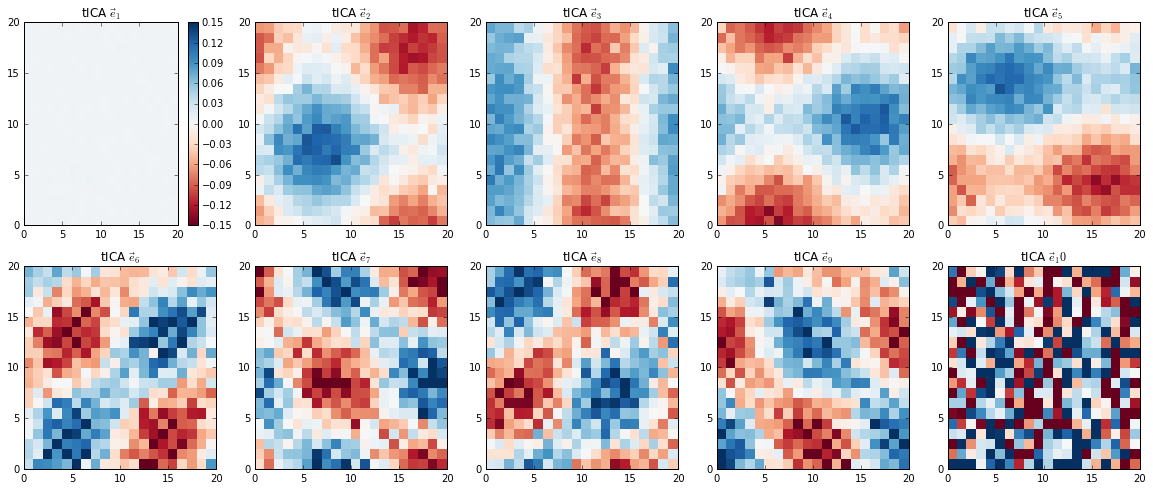

In [3]:
import numpy as np
import glob


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure( figsize=(20,8))

npanels = 10
for j in range(min(npanels,ntica)):
    plt.subplot(2,5,j+1)
    #print 'tica.eigenvectors_[:,j].min()', tica.eigenvectors_[:,j].min()
    #print 'tica.eigenvectors_[:,j].max()', tica.eigenvectors_[:,j].max()
    plt.pcolor( tica.eigenvectors_[:,j].reshape( (20,20) ), cmap='RdBu', vmin=-0.15, vmax=0.15)
    if j == 0:
        plt.colorbar()
    plt.title('tICA $\\vec{e}_%d$'%(j+1))


## Clustering and visualization
See: http://msmbuilder.org/3.7.0/examples/Fs-Peptide-in-RAM.html

First, let's generate some initial points to start the *kmeans* clustering. This is important because random selection of cluster generators based on the samples alone will be biased toward the two basins.

In [5]:
# find the max and min of the tica data and scale the initial points accordingly
tica_mins = np.zeros( (len(tica_coords),ntica) )
tica_maxs = np.zeros( (len(tica_coords),ntica) ) 
for i in range(len(tica_coords)):
    tica_mins[i,:] = np.min(tica_coords[i], axis=0)
    tica_maxs[i,:] = np.max(tica_coords[i], axis=0)
best_tica_mins = np.min(tica_mins, axis=0)
best_tica_maxs = np.min(tica_maxs, axis=0)
print 'best_tica_mins', best_tica_mins
print 'best_tica_maxs', best_tica_maxs



best_tica_mins [-1.21593284 -8.87238539 -8.46989552 -8.58442424 -8.92615998 -8.7643737
 -9.36438245 -8.23607215 -8.83314434 -7.20757453]
best_tica_maxs [ 1.20336801  7.56398754  7.39165898  7.16975288  7.59823383  6.5006905
  6.66628367  6.56461328  6.93353531  5.61558966]


NotImplemented
(251034, 10)
(251034,)


/Users/vv/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:821: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  n_jobs=self.n_jobs)


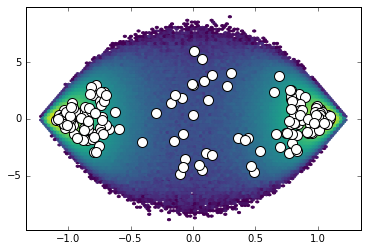

In [6]:
########################################################
### 1) start with an initial guess of the cluster centers

number_of_clusters = 200 # 2000

# ntica = 10
# ntica is defined in the cells above
initial_generators = np.random.random( (number_of_clusters,ntica) )
widths = best_tica_maxs - best_tica_mins
for i in range(ntica):
    initial_generators[:,i] = initial_generators[:,i]*widths[i] + best_tica_mins[i]
# print 'initial_generators', initial_generators

########################################################
### 2) cluster using 1/100 of the data
%matplotlib inline
import matplotlib.pyplot as plt

from msmbuilder.cluster import MiniBatchKMeans, KMeans
#clusterer = MiniBatchKMeans(n_clusters=number_of_clusters, init=initial_generators)
clusterer = KMeans(n_clusters=number_of_clusters, init=initial_generators)

# create a subset of the data to do initial cluster on
tica_coords_subset = [t[0::100,:] for t in tica_coords]
clusterer.fit(tica_coords_subset)

# next, assign the rest of the data
clustered_trajs = clusterer.predict(tica_coords)

print(clusterer.summarize())

print(tica_coords[0].shape)
print(clustered_trajs[0].shape)

txx = np.concatenate(tica_coords)
plt.hexbin(txx[:,0], txx[:,1], bins='log', mincnt=1, cmap='viridis')
plt.scatter(clusterer.cluster_centers_[:,0],
            clusterer.cluster_centers_[:,1], 
            s=100, c='w')


%matplotlib inline
import matplotlib.pyplot as plt


txx = np.concatenate(tica_coords)
plt.hexbin(txx[:,0], txx[:,1], bins='log', mincnt=1, cmap='viridis')
plt.scatter(clusterer.cluster_centers_[:,0],
            clusterer.cluster_centers_[:,1], 
            s=100, c='w')

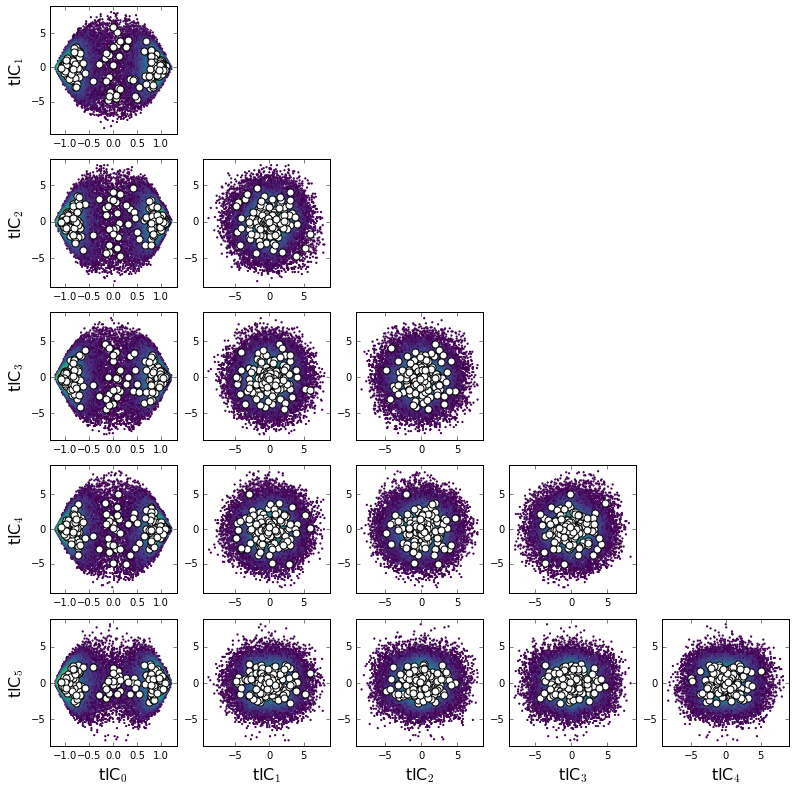

In [9]:
# tICA cross-plots

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure( figsize=(16,16))
npanels = 6

for i in range(npanels):
    for j in range(npanels):
        if i < j:
            plt.subplot(npanels,npanels, i+j*npanels + 1)
            txx = np.concatenate(tica_coords)
            plt.hexbin(txx[0::20,i], txx[0::20,j], bins='log', mincnt=1, cmap='viridis')
            plt.scatter(clusterer.cluster_centers_[:,i], clusterer.cluster_centers_[:,j], s=50, c='w')
            if j == npanels-1:
                plt.xlabel('tIC$_%d$'%i, fontsize=16)
            if i == 0:
                plt.ylabel('tIC$_%d$'%j, fontsize=16)

### spectral estimates ###
implied timescale (100 us lagtime): 0.433923785853 ms
Spectral estimate of crossing rate (kHz),  k = (1/tau)/2: 1.15227608235
average dwell time (ms), 1/k = 2*tau 0.867847571705


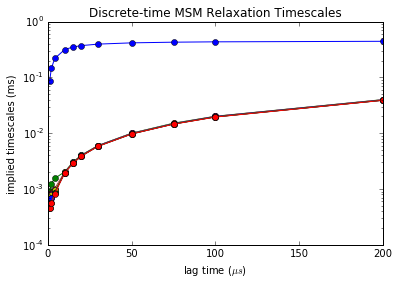

In [7]:
########################################################
### 3) calculate implied timescales with respect to lag time to find slowest rate process

%matplotlib inline
import matplotlib.pyplot as plt

from msmbuilder.msm import ContinuousTimeMSM, MarkovStateModel, implied_timescales

lag_times = np.array([1, 2, 4, 10, 15, 20, 30, 50, 75, 100, 200])
n_timescales = 10
dt = 1.0e-6

msm_timescales = implied_timescales(clustered_trajs, lag_times, n_timescales=n_timescales, msm=MarkovStateModel(verbose=False))
for i in range(n_timescales):
   plt.plot(lag_times*dt*1.0e6, msm_timescales[:, i]*dt*1.0e3, 'o-')  # lagtime in us,  implied timescales in ms

plt.title('Discrete-time MSM Relaxation Timescales')
plt.semilogy()
plt.xlabel('lag time ($\\mu s$)')
plt.ylabel('implied timescales (ms)')

print '### spectral estimates ###'
lag_times = [1, 2, 4, 10, 15, 20, 30, 50, 75, 100, 200]
tau = msm_timescales[lag_times.index(100), 0]
print 'implied timescale (100 us lagtime):', tau*dt*1.0e3, 'ms'
print 'Spectral estimate of crossing rate (kHz),  k = (1/tau)/2:', 0.5/(tau*dt*1.0e3)
print 'average dwell time (ms), 1/k = 2*tau', 2*tau*dt*1.0e3



